In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

1 0 201
1 1 201
5 0 201
5 1 201
20 0 201
20 1 201
50 0 201
50 1 201
100 0 201
100 1 201


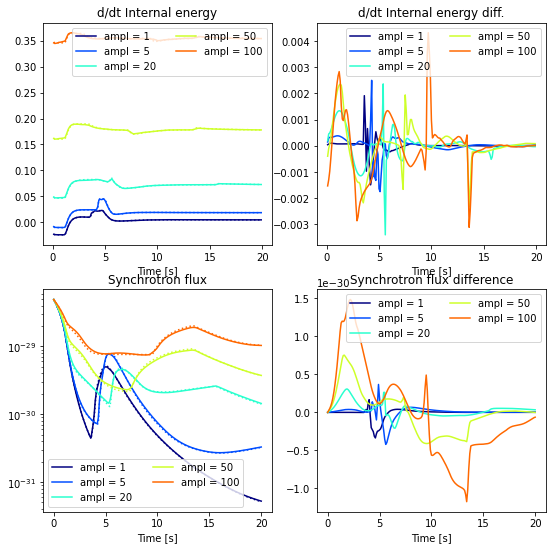

In [11]:
amplitudes = [1,5,20,50,100] # 10
n_ampl = len(amplitudes)

colors = {amplitudes[i]:cm.jet(1.0*i/n_ampl) for i in range(n_ampl)}
linestyles = {0:':', 1:'-'}

fig = plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(2,2)

# d/dt Internal energy ---------------------------------------
plt.subplot(gs[0,0])
for ampl in amplitudes:
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data = pkl.load(f)
        
        print(ampl, corr, len(data['times']))
        
        if corr == 0:
            plt.plot(data['times'][:-1], data['ddt_internal_energy'][:-1], color=colors[ampl], ls=linestyles[corr])
        else:
            plt.plot(data['times'][:-1], data['ddt_internal_energy'][:-1], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
        del data
plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('d/dt Internal energy')

# d/dt Internal energy difference -----------------------------
plt.subplot(gs[0,1])
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
        
    plt.plot(data[0]['times'][:-1], data[1]['ddt_internal_energy'][:-1] - data[0]['ddt_internal_energy'][:-1], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
    del data

plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('d/dt Internal energy diff.')

# Synchrotron flux ------------------------------------------
plt.subplot(gs[1,0])
for ampl in amplitudes:
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data = pkl.load(f)
        
        if corr == 0:
            plt.plot(data['times'], data['flux_density'], color=colors[ampl], ls=linestyles[corr])
        else:
            plt.plot(data['times'], data['flux_density'], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
        del data
plt.gca().set_yscale('log')
plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('Synchrotron flux')

# Synchrotron flux difference --------------------------------
plt.subplot(gs[1,1])
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
        
    plt.plot(data[0]['times'], data[1]['flux_density'] - data[0]['flux_density'], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
    del data

plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('Synchrotron flux difference')

if False:
    plt.savefig('pencil_amplitude.png', format='png', dpi=600)
else:
    plt.show()
plt.close()